In [1]:
%matplotlib inline

In [2]:
import numpy
import pandas
import matplotlib.pyplot as plot
import seaborn

In [3]:
student_data = pandas.read_csv("studentdata.csv", sep=' ', quoting=1)
print(student_data.shape)
student_data = student_data.dropna()

(657, 11)


In [4]:
student_data.head()

,Student,Height,Gender,Shoes,Number,Dvds,ToSleep,WakeUp,Haircut,Job,Drink
1,1,67,female,10,5,10,-2.5,5.5,60,30.0,water
2,2,64,female,20,7,5,1.5,8.0,0,20.0,pop
3,3,61,female,12,2,6,-1.5,7.5,48,0.0,milk
4,4,61,female,3,6,40,2.0,8.5,10,0.0,water
5,5,70,male,4,5,6,0.0,9.0,15,17.5,pop


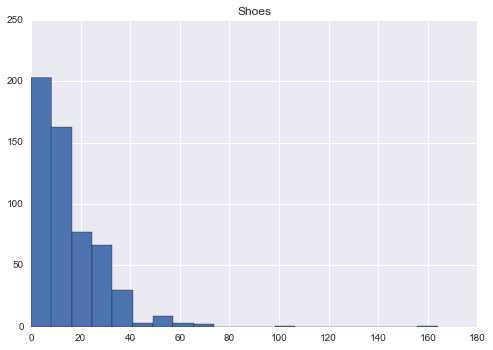

In [5]:
shoes_histogram = plot.hist(student_data.Shoes.values, bins=20)
plot.title('Shoes')
seaborn.despine()

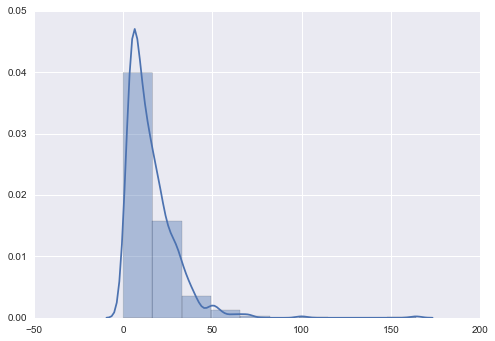

In [6]:
seaborn.distplot(student_data.Shoes.values, bins=10)

In [7]:
student_data.Haircut.describe(percentiles=[.025, .25, .5, .75, .975])

count    559.000000
mean      26.228569
std       27.782842
min        0.000000
2.5%       0.000000
25%       10.000000
50%       17.000000
75%       30.000000
97.5%    100.450000
max      180.000000
Name: Haircut, dtype: float64

In [8]:
drinks_by_gender = student_data.groupby(['Gender', 'Drink']).count().Student  # kinda hacky, but it gets us the counts
drinks_by_gender

Gender  Drink
female  milk      55
        pop       94
        water    215
male    milk      42
        pop       60
        water     93
Name: Student, dtype: int64

In [9]:
male_counts = drinks_by_gender['male']
female_counts = drinks_by_gender['female']

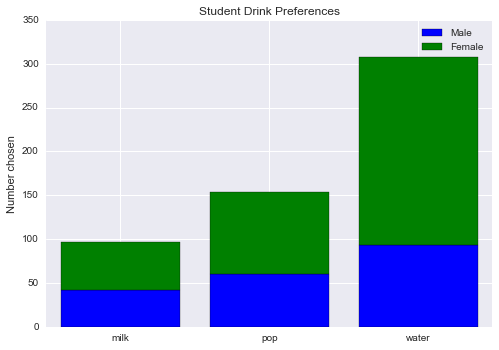

In [10]:
male_bars = plot.bar(range(len(male_counts)), male_counts.values, align='center', color='b')
female_bars = plot.bar(range(len(female_counts)), female_counts.values, align='center', bottom=male_counts.values, color='g')
plot.xticks(range(len(male_counts)), male_counts.keys())

plot.ylabel('Number chosen')
plot.title('Student Drink Preferences')
plot.legend((male_bars[0], female_bars[0]), ('Male', 'Female'))
seaborn.despine()


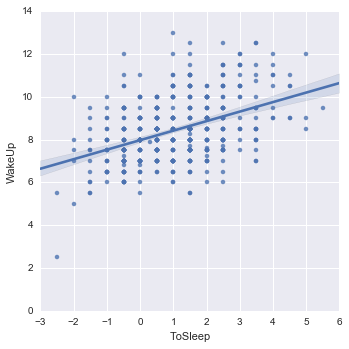

In [11]:
seaborn.lmplot("ToSleep", "WakeUp", student_data)
# There is a positive coorelation